In [265]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter  
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from textwrap import wrap
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [12]:
df_match = pd.read_csv('dataset.csv')
df_match.head()

,stage,home_team_goal,away_team_goal,possession_home,B365H,B365D,B365A,BWH,BWD,BWA,...,shoton_home,shoton_away,shotoff_home,shotoff_away,foulcommit_home,foulcommit_away,ycard_home,ycard_away,rcard_home,rcard_away
0,2,0,2,57,1.83,3.50,4.33,1.80,3.60,4.00,...,10,4,6,4,12,12,3,2,0,0
1,21,1,2,57,3.60,3.30,2.10,3.45,3.30,2.05,...,6,9,6,8,10,18,2,1,0,0
2,21,1,3,60,1.80,3.60,4.50,1.72,3.60,4.50,...,8,0,4,1,5,6,0,2,0,0
3,21,1,1,51,2.50,3.30,2.88,2.45,3.20,2.75,...,4,3,5,6,12,10,2,0,0,0
4,21,4,0,53,2.10,3.25,3.75,2.00,3.25,3.65,...,4,6,5,6,13,10,2,2,0,1


In [13]:
for columnName in df_match:
    print ('Column:', columnName)
    column = df_match[columnName]
    if np.issubdtype(column.dtype, np.number):
        q25 = column.quantile(.25)
        q75 = column.quantile(.75)
        amplitude = 1.5 * (q75 - q25)
        low_limit = q25 - amplitude
        high_limit = q75 + amplitude
        print ('Median:', column.median())
        print ('25%/75%:', q25, q75)
        print ('Outliers limits:', low_limit, high_limit)
        print ('Outliers:', column[column < low_limit].count(), column[column > high_limit].count())
        print ('Count:', column.count())
        print ('Mean:', column.mean())
        print ('Variance:', column.var())
        print ('std:', column.std())
        print ('min:', column.min())
        print ('max:', column.max())
    print ('number of unique values:', len(column.unique()))
    if len(column.unique()) == 2:
        print ('value counts: ', column.value_counts().values)
    print ('mode:', column.mode().values)
    print ()

Column: stage
Median: 20.0
25%/75%: 10.0 30.0
Outliers limits: -20.0 60.0
Outliers: 0 0
Count: 2393
Mean: 20.1190973673
Variance: 122.977866743
std: 11.0895386172
min: 1
max: 38
number of unique values: 38
mode: [28 29 30 31 32 33 34 36 37 38]

Column: home_team_goal
Median: 1.0
25%/75%: 1.0 2.0
Outliers limits: -0.5 3.5
Outliers: 0 180
Count: 2393
Mean: 1.55704137066
Variance: 1.72260194519
std: 1.31247931229
min: 0
max: 8
number of unique values: 9
mode: [1]

Column: away_team_goal
Median: 1.0
25%/75%: 0.0 2.0
Outliers limits: -3.0 5.0
Outliers: 0 8
Count: 2393
Mean: 1.18219807773
Variance: 1.31963279185
std: 1.14875271136
min: 0
max: 6
number of unique values: 7
mode: [0]

Column: possession_home
Median: 52.0
25%/75%: 46.0 58.0
Outliers limits: 28.0 76.0
Outliers: 8 8
Count: 2393
Mean: 51.6372753865
Variance: 81.7270715031
std: 9.04030262232
min: 20
max: 80
number of unique values: 55
mode: [52]

Column: B365H
Median: 2.2
25%/75%: 1.67 3.0
Outliers limits: -0.3250000000000002 4.995


In [264]:
rows = df_match['home_team_goal'].count()
print ('Home win:', np.sum(np.where(df_match['home_team_goal'] >  df_match['away_team_goal'], 1, 0))/rows)
print ('Away win:', np.sum(np.where(df_match['home_team_goal'] == df_match['away_team_goal'], 1, 0))/rows)
print ('Draw:', np.sum(np.where(df_match['home_team_goal'] <  df_match['away_team_goal'], 1, 0))/rows)

Home win: 0.450898453824
Away win: 0.257835353113
Draw: 0.291266193063


### Does attributes normal distributed

In [14]:
##Confirm the normal distribution against each column values

##use scipy function for test
for columnName in df_match:
    print (columnName, " :Shapiro ", stats.shapiro(df_match[columnName].tolist()))
    print (columnName, " :Pearson ", stats.normaltest(df_match[columnName].tolist()), "\n")


stage  :Shapiro  (0.9491441249847412, 4.976150382759686e-28)
stage  :Pearson  NormaltestResult(statistic=2583.569665331433, pvalue=0.0) 

home_team_goal  :Shapiro  (0.8820047378540039, 2.5016456626604505e-39)
home_team_goal  :Pearson  NormaltestResult(statistic=386.51427308665245, pvalue=1.1735240943905259e-84) 

away_team_goal  :Shapiro  (0.8515219688415527, 9.234556879900544e-43)
away_team_goal  :Pearson  NormaltestResult(statistic=329.52383347285325, pvalue=2.7848944108583536e-72) 

possession_home  :Shapiro  (0.9982931017875671, 0.013109136372804642)
possession_home  :Pearson  NormaltestResult(statistic=1.2666284015150224, pvalue=0.53082960660255485) 

B365H  :Shapiro  (0.7721923589706421, 0.0)
B365H  :Pearson  NormaltestResult(statistic=1062.2772677656692, pvalue=2.1351194610956052e-231) 

B365D  :Shapiro  (0.7055726647377014, 0.0)
B365D  :Pearson  NormaltestResult(statistic=1204.0201761472408, pvalue=3.5509184588211322e-262) 

B365A  :Shapiro  (0.7656803727149963, 0.0)
B365A  :Pe

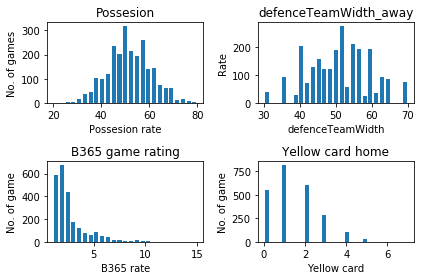

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2)
##Most not norm distributed, possesion seems to be. plot it in histogram.
phhist, phbins = np.histogram(df_match['possession_home'].tolist(), bins=25)  # plt.hist passes it's arguments to np.histogram
phwidth = 0.7 * (phbins[1] - phbins[0])
phcenter = (phbins[:-1] + phbins[1:]) / 2 # bin edges for the x-axis, a function of bins 


plt.figure(1)
plt.subplot(221)
plt.bar(phcenter, phhist, align='center', width=phwidth)
plt.xlabel('Possesion rate')
plt.ylabel('No. of games')
plt.title('Possesion')



dtwhist, dtwbins = np.histogram(df_match['defenceTeamWidth_away'].tolist(), bins=25)  # plt.hist passes it's arguments to np.histogram
dtwwidth = 0.7 * (dtwbins[1] - dtwbins[0])
dtwcenter = (dtwbins[:-1] + dtwbins[1:]) / 2 # bin edges for the x-axis, a function of bins 
plt.subplot(222)
plt.bar(dtwcenter, dtwhist, align='center', width=dtwwidth)


plt.xlabel('defenceTeamWidth')
plt.ylabel('Rate')
plt.title('defenceTeamWidth_away')


bhhist, bhbins = np.histogram(df_match['B365H'].tolist(), bins=25)  # plt.hist passes it's arguments to np.histogram
bhwidth = 0.7 * (bhbins[1] - bhbins[0])
bhcenter = (bhbins[:-1] + bhbins[1:]) / 2 # bin edges for the x-axis, a function of bins 
plt.subplot(223)
plt.bar(bhcenter, bhhist, align='center', width=bhwidth)
plt.xlabel('B365 rate')
plt.ylabel('No. of game')
plt.title('B365 game rating')


yhhist, yhbins = np.histogram(df_match['ycard_home'].tolist(), bins=25)  # plt.hist passes it's arguments to np.histogram
yhwidth = 0.7 * (yhbins[1] - yhbins[0])
yhcenter = (yhbins[:-1] + yhbins[1:]) / 2 # bin edges for the x-axis, a function of bins 
plt.subplot(224)
plt.bar(yhcenter, yhhist, align='center', width=yhwidth)
plt.xlabel('Yellow card')
plt.ylabel('No. of game')
plt.title('Yellow card home')

plt.tight_layout()
plt.show()


### Does data correlated

AttributeError: 'AxesSubplot' object has no attribute 'autoscale_None'

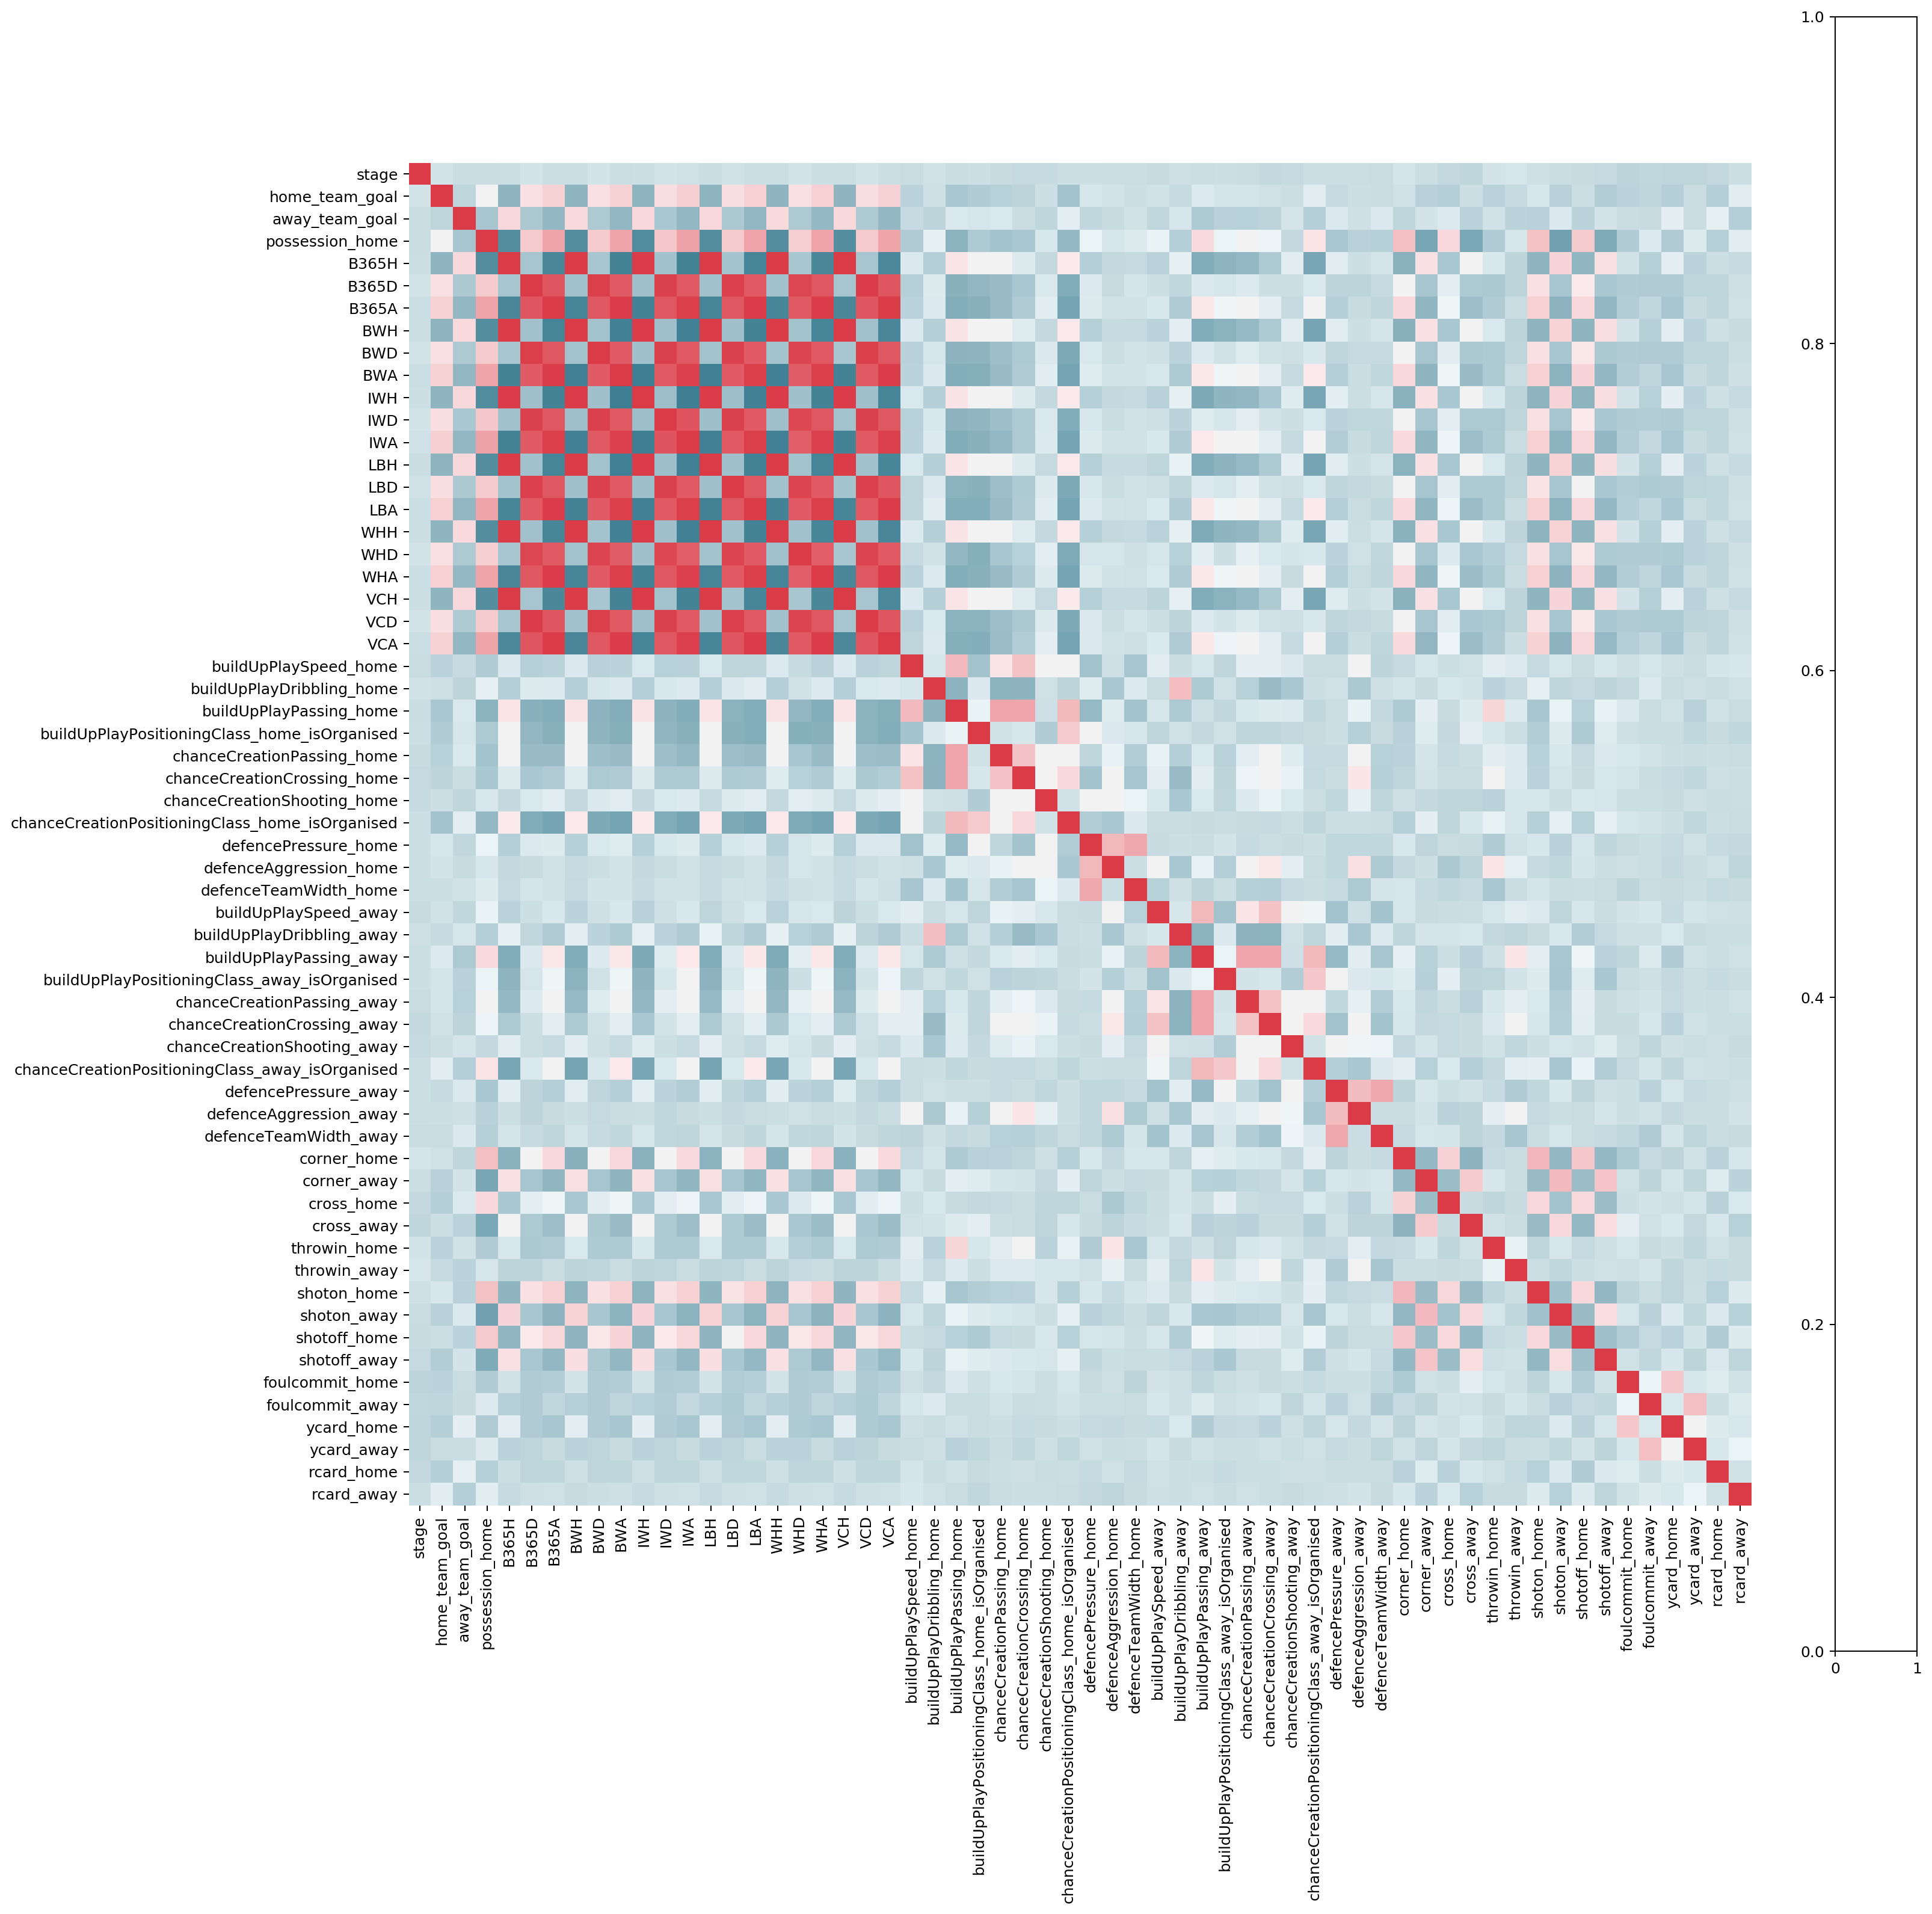

In [274]:
fig = plt.figure(num=None, figsize=(20, 20), dpi=180, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1) # two rows, one column, first plot
corr = df_match.corr()
#divider = make_axes_locatable(ax)
#cax = divider.append_axes('right', size='5%', pad=0.05)
h = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, cbar=False)
fig.colorbar(h)
plt.show()

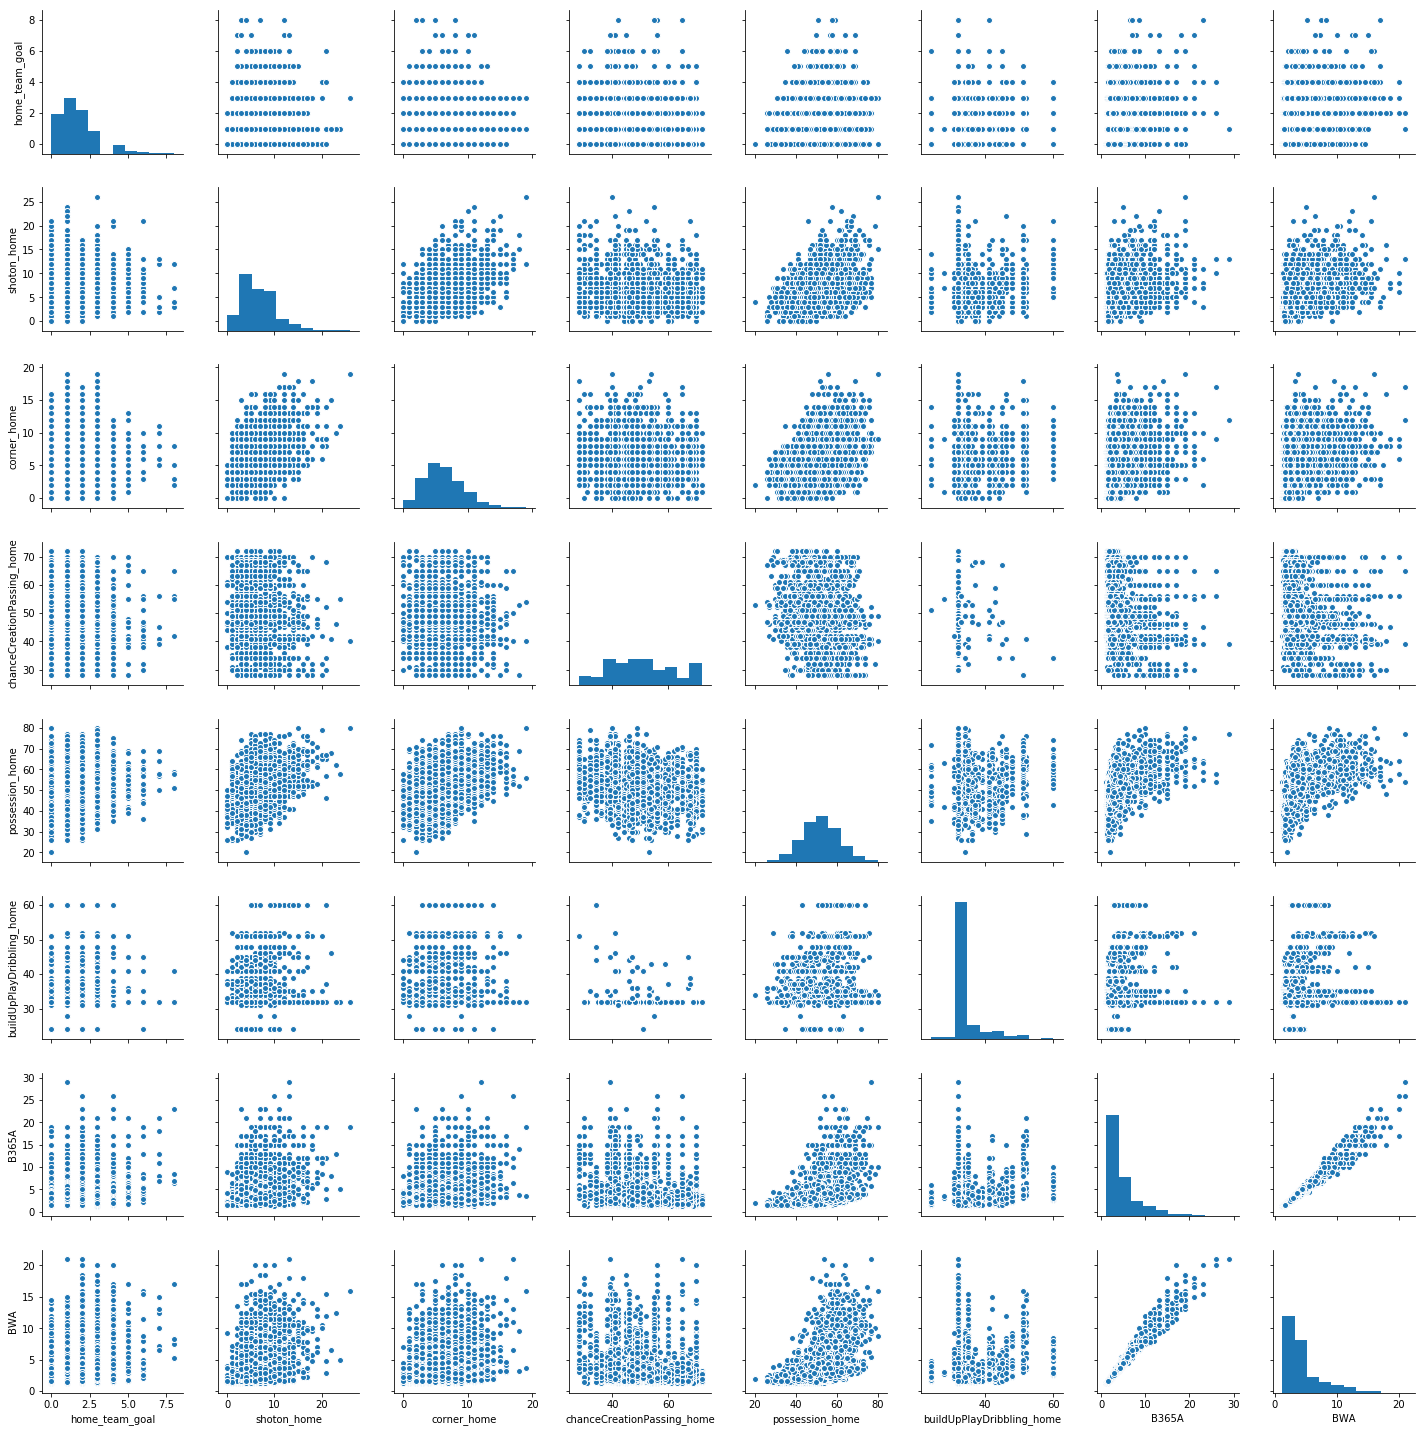

In [90]:
sns.pairplot(df_match[['home_team_goal', 'shoton_home','corner_home','chanceCreationPassing_home','possession_home','buildUpPlayDribbling_home','B365A','BWA']])

['stage' 'B365H' 'B365D' 'B365A' 'BWH' 'BWD' 'BWA' 'IWH' 'IWD' 'IWA' 'LBH'
 'LBD' 'LBA' 'WHH' 'WHD' 'WHA' 'VCH' 'VCD' 'VCA' 'buildUpPlaySpeed_home'
 'buildUpPlayDribbling_home' 'buildUpPlayPassing_home'
 'buildUpPlayPositioningClass_home_isOrganised'
 'chanceCreationPassing_home' 'chanceCreationCrossing_home'
 'chanceCreationShooting_home'
 'chanceCreationPositioningClass_home_isOrganised' 'defencePressure_home'
 'defenceAggression_home' 'defenceTeamWidth_home' 'buildUpPlaySpeed_away'
 'buildUpPlayDribbling_away' 'buildUpPlayPassing_away'
 'buildUpPlayPositioningClass_away_isOrganised'
 'chanceCreationPassing_away' 'chanceCreationCrossing_away'
 'chanceCreationShooting_away'
 'chanceCreationPositioningClass_away_isOrganised' 'defencePressure_away'
 'defenceAggression_away' 'defenceTeamWidth_away']
[ 0.32858837  0.45702043  0.5404545   0.5901506   0.63428029  0.67313183
  0.70760243  0.74045824  0.76714979  0.79277571  0.81680183  0.83925132
  0.85811032  0.87581498  0.89333104  0.90898

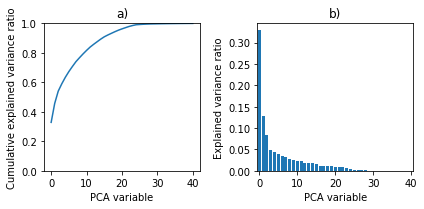

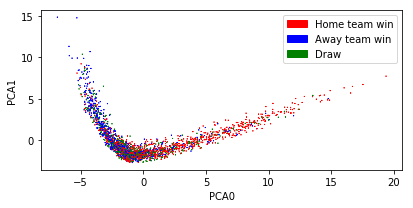

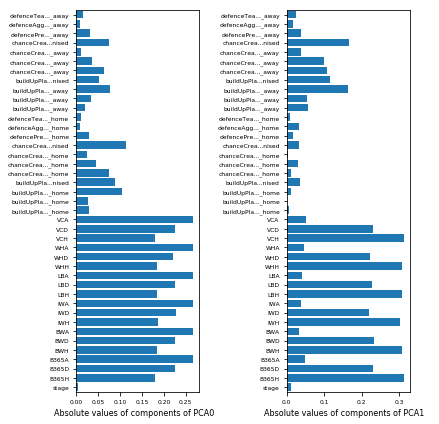

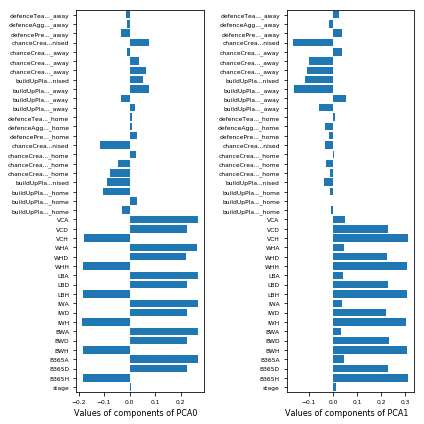

In [252]:
def do_pca(df):
    print (df.columns.values)
    
    standardized = (df - df.mean()) / df.std()
    pca = PCA()
    pca.fit(standardized)
    pcavar = np.arange(len(pca.explained_variance_ratio_))
    apply_pca = lambda pcanr: np.einsum('i,ji->j', pca.components_[pcanr], standardized)
    win  = df_match['home_team_goal'] >  df_match['away_team_goal']
    draw = df_match['home_team_goal'] == df_match['away_team_goal']
    lose = df_match['home_team_goal'] <  df_match['away_team_goal']
    
    print (np.cumsum(pca.explained_variance_ratio_))
    print (pca.explained_variance_ratio_)
    fig, ax = plt.subplots(1, 2, figsize=(6, 3))
    ax = np.reshape(ax, -1)    
    ax[0].plot(pcavar, np.cumsum(pca.explained_variance_ratio_))
    ax[0].set_xlabel('PCA variable')
    ax[0].set_ylabel('Cumulative explained variance ratio')
    ax[0].set_title('a)')
    ax[0].set_ylim([0, 1])
    ax[1].bar(pcavar, pca.explained_variance_ratio_)
    ax[1].set_xlabel('PCA variable')
    ax[1].set_ylabel('Explained variance ratio')
    ax[1].set_xlim([np.min(pcavar)-0.5, np.max(pcavar)+0.5])
    ax[1].set_title('b)')
    fig.tight_layout()
    fig.savefig('pca_variables.pdf')
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    ax = np.reshape(ax, -1)    
    colors = np.full(len(df_match['away_team_goal']), 'r')
    colors[draw] = 'g';
    colors[lose] = 'b';
    ax[0].scatter(apply_pca(0), apply_pca(1), c=colors, s=0.1, marker='*')
    ax[0].set_xlabel('PCA0')
    ax[0].set_ylabel('PCA1')
    red = mpatches.Patch(color='red', label='Home team win')
    blue = mpatches.Patch(color='blue', label='Away team win')
    green = mpatches.Patch(color='green', label='Draw')
    ax[0].legend(handles=[red, blue, green], labels=['Home team win', 'Away team win', 'Draw'])
    fig.tight_layout()
    fig.savefig('pca_scatter.pdf')
    
    labels = [ l[:10] + "..."+l[-5:] if len(l) > 15 else l for l in standardized.columns  ]
    fig, ax = plt.subplots(1, 2, figsize=(6, 6))
    ax = np.reshape(ax, -1)    
    for i in range(2):
        x = np.arange(len(pca.components_[i]))
        ax[i].barh(x, np.abs(pca.components_[i]), tick_label=labels)
        ax[i].set_xlabel('Absolute values of components of PCA%d   ' % i, fontsize=8)
        ax[i].set_ylim([np.min(x)-0.5, np.max(x)+0.5])
        ax[i].tick_params(axis='both', which='major', labelsize=6)
    fig.tight_layout()
    fig.savefig('pca_components.pdf')
    
    fig, ax = plt.subplots(1, 2, figsize=(6, 6))
    ax = np.reshape(ax, -1)    
    for i in range(2):
        x = np.arange(len(pca.components_[i]))
        ax[i].barh(x, pca.components_[i], tick_label=labels)
        ax[i].set_xlabel('Values of components of PCA%d   ' % i, fontsize=8)
        ax[i].set_ylim([np.min(x)-0.5, np.max(x)+0.5])
        ax[i].tick_params(axis='both', which='major', labelsize=6)
    fig.tight_layout()
    fig.savefig('pca_components_withsign.pdf')
    
#do_pca(df_match)
team_attributes = ['buildUpPlaySpeed_home', 'buildUpPlayDribbling_home', 'buildUpPlayPassing_home',
                      'buildUpPlayPositioningClass_home_isOrganised', 'chanceCreationPassing_home',
                      'chanceCreationCrossing_home', 'chanceCreationShooting_home',
                      'chanceCreationPositioningClass_home_isOrganised', 'defencePressure_home',
                      'defenceAggression_home', 'defenceTeamWidth_home', 'buildUpPlaySpeed_away',
                      'buildUpPlayDribbling_away', 'buildUpPlayPassing_away' ,
                      'buildUpPlayPositioningClass_away_isOrganised', 'chanceCreationPassing_away',
                      'chanceCreationCrossing_away', 'chanceCreationShooting_away',
                      'chanceCreationPositioningClass_away_isOrganised', 'defencePressure_away' ,
                      'defenceAggression_away', 'defenceTeamWidth_away']
#do_pca(df_match.filter(team_attributes + ['stage']))
after_match_attributes = ['home_team_goal', 'away_team_goal', 'possession_home', 'shoton_home', 'shoton_away', 
                      'shotoff_home', 'shotoff_away', 'corner_home', 'corner_away', 'cross_home', 'cross_away', 
                      'foulcommit_home', 'foulcommit_away', 'rcard_home', 'rcard_away', 'ycard_home', 'ycard_away', 
                      'throwin_home', 'throwin_away']
do_pca(df_match.drop(after_match_attributes, axis=1))

Index(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA',
       'LBH', 'LBD', 'LBA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA'],
      dtype='object')
Index(['buildUpPlaySpeed_home', 'buildUpPlayDribbling_home',
       'buildUpPlayPassing_home',
       'buildUpPlayPositioningClass_home_isOrganised',
       'chanceCreationPassing_home', 'chanceCreationCrossing_home',
       'chanceCreationShooting_home',
       'chanceCreationPositioningClass_home_isOrganised',
       'defencePressure_home', 'defenceAggression_home',
       'defenceTeamWidth_home', 'buildUpPlaySpeed_away',
       'buildUpPlayDribbling_away', 'buildUpPlayPassing_away',
       'buildUpPlayPositioningClass_away_isOrganised',
       'chanceCreationPassing_away', 'chanceCreationCrossing_away',
       'chanceCreationShooting_away',
       'chanceCreationPositioningClass_away_isOrganised',
       'defencePressure_away', 'defenceAggression_away',
       'defenceTeamWidth_away'],
      dtype='object')
Index(['s

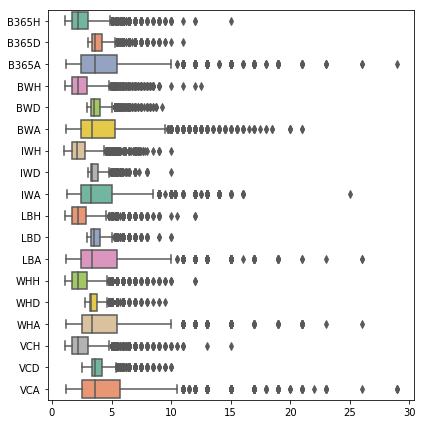

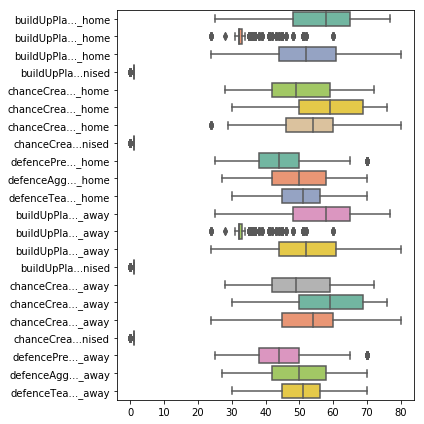

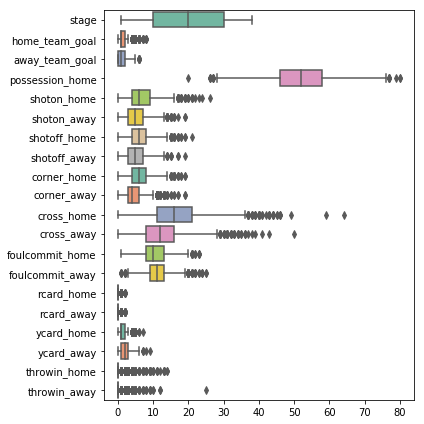

In [254]:
def do_boxplot(df, name):
    print(df.columns)
    labels = [ l[:10] + "..."+l[-5:] if len(l) > 15 else l for l in df.columns  ]
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    sns.boxplot(data=df, orient="h", palette="Set2", ax=ax)
    ax.set_yticklabels(labels)
    fig.tight_layout()
    fig.savefig('box_%s.pdf' % name)
    
do_boxplot(df_match.filter(regex='.*[HAD]$'), 'odds')
do_boxplot(df_match.filter(team_attributes), 'team')
do_boxplot(df_match.filter(['stage'] + after_match_attributes), 'misc')